In [35]:
from pyvis.network import Network
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout


In [3]:
df_1 = pd.read_csv('C:/Users/damia/Documents/CODICI_PYTHON/snana/PROGETTO/FMF_Network.txt')
df_1.A = df_1['A'].astype(str)
df_1.B = df_1['B'].astype(str)
df_2 = pd.read_csv('C:/Users/damia/Documents/CODICI_PYTHON/snana/PROGETTO/FMF_Network2.txt')
df_2.A = df_2['A'].astype(str)
df_2 = df_2.groupby(['A','B']).sum()
df_2.to_csv('Zetas.csv')
df_2 = pd.read_csv('C:/Users/damia/Documents/CODICI_PYTHON/snana/PROGETTO/Zetas.csv')
df = pd.concat([df_1, df_2], ignore_index=True, sort=False)
df

,A,B,Weight
0,2,1992,1
1,2,1993,1
2,2,1994,1
3,2,1999,1
4,7,1998,1
5,9,1994,1
6,11,1994,1
7,15,1994,1
8,15,1996,1
9,15,1999,1


In [4]:
x = df.values.tolist()
x

[['2', '1992', 1],
 ['2', '1993', 1],
 ['2', '1994', 1],
 ['2', '1999', 1],
 ['7', '1998', 1],
 ['9', '1994', 1],
 ['11', '1994', 1],
 ['15', '1994', 1],
 ['15', '1996', 1],
 ['15', '1999', 1],
 ['17', '1999', 1],
 ['20', '1998', 1],
 ['21', '1998', 1],
 ['22', '1994', 1],
 ['25', '1992', 1],
 ['25', '1993', 1],
 ['25', '1994', 1],
 ['25', '1999', 1],
 ['26', '1993', 1],
 ['26', '1994', 1],
 ['26', '1999', 1],
 ['27', '1998', 1],
 [1992, 'Zetas', 2],
 [1993, 'Zetas', 3],
 [1994, 'Zetas', 10],
 [1996, 'Zetas', 1],
 [1998, 'Zetas', 5],
 [1999, 'Zetas', 5]]

In [4]:
df[0:1]

,A,B,Weight
0,2,1992,1


In [61]:
net = Network(height='750px', width='100%', bgcolor='#222222', font_color='white')
for i in df_1.A.unique():
    name = str(i)
    net.add_node(name, color = 'red')

for i in df_1.B.unique():
    name = str(i)
    net.add_node(name, color = 'blue')

net.add_node('Zetas', color = 'green')


for i in range(len(x)):
    edge = x[i]
    add = -1

    for o in range(len(edge)):
        add = add + 1
        
        if add == 0:
            A = edge[add]
            
        elif add == 1:
            B = edge[add]
            
        else:
            W = edge[add]
    
    net.add_edge(str(A), str(B) ,velue=int(W))
    print(W)




net.show('xxx.html')
    

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
3
10
1
5
5


2 1992 1
2 1993 1
2 1994 1
2 1999 1
7 1998 1
9 1994 1
11 1994 1
15 1994 1
15 1996 1
15 1999 1
17 1999 1
20 1998 1
21 1998 1
22 1994 1
25 1992 1
25 1993 1
25 1994 1
25 1999 1
26 1993 1
26 1994 1
26 1999 1
27 1998 1
1992 Zetas 2
1993 Zetas 3
1994 Zetas 10
1996 Zetas 1
1998 Zetas 5
1999 Zetas 5


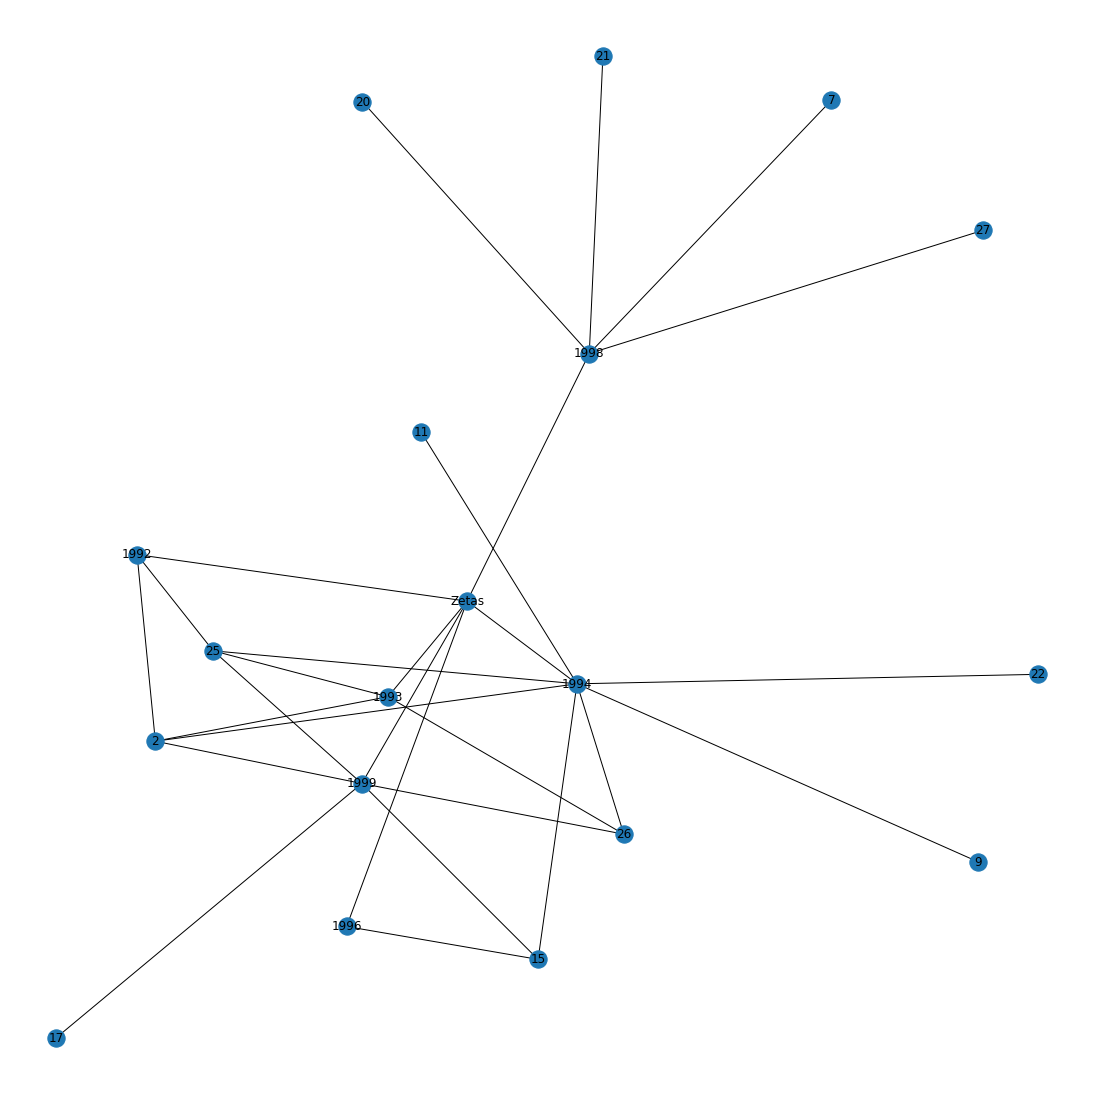

In [28]:
G = nx.Graph()

for i in df_1.A.unique():
    name = str(i)
    G.add_node(name, color = 'red')

for i in df_1.B.unique():
    name = str(i)
    G.add_node(name, color = 'blue')

G.add_node('Zetas', color = 'green')


for i in range(len(x)):
    edge = x[i]
    add = -1

    for o in range(len(edge)):
        add = add + 1
        
        if add == 0:
            A = edge[add]
            
        elif add == 1:
            B = edge[add]
            
        else:
            W = edge[add]
    G.add_edge(str(A), str(B) ,weight=int(W))
    print(A,B,W)


nx.draw(G,with_labels=True)

pass    

## DA QUI

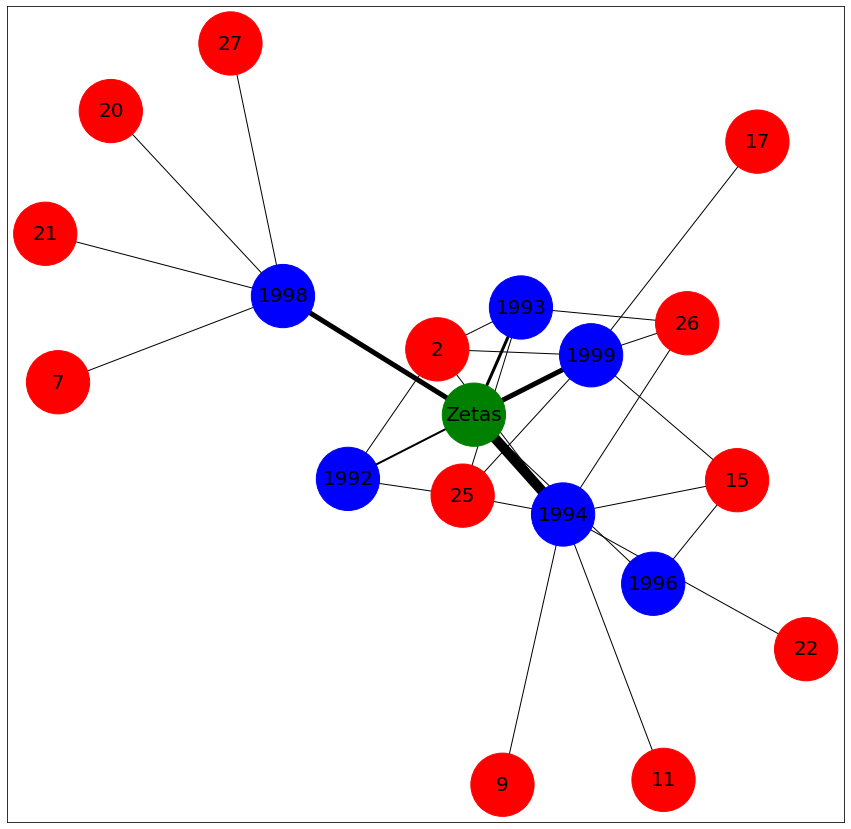

In [29]:
all_weights=[]
for (node1,node2,data) in G.edges(data=True):
        all_weights.append(data['weight']) #we'll use this when determining edge thickness

nodes_color=[]
for (node1,data) in G.nodes(data=True):
        nodes_color.append(data['color']) #we'll use this when determining edge thickness


unique_weights = list(set(all_weights))

pos = nx.spring_layout(G)

for weight in unique_weights:
        #4 d. Form a filtered list with just the weight you want to draw
        weighted_edges = [(node1,node2) for (node1,node2,edge_attr) in G.edges(data=True) if edge_attr['weight']==weight]
        width = weight
        nx.draw_networkx_edges(G,pos,edgelist=weighted_edges,width=width)


nx.draw_networkx_nodes(G,pos,node_color=nodes_color, node_size=4000)

nx.draw_networkx_labels(G,pos,font_size=20, font_family="sans-serif")

#plt.axis('off')
#plt.rcParams["figure.figsize"] = (15,15)
#plt.show()

pass

### METRICHE

In [20]:
#CALCOLO DEI DEGREE DEI NODI E DELL'AVERAGE DEGREE
## accesso a tutti i node degree
print('Calcolo il degree di ogni singolo nodo della rete:')
for node,degree in G.degree():
    print('il nodo',node,'ha degree:',degree)
    
somma_degree = sum(dict(G.degree()).values())
print('\nLa somma dei node degree è:',somma_degree)
print('\nL\'average degree di questa network è',somma_degree/(len(G)))

Calcolo il degree di ogni singolo nodo della rete:
il nodo 2 ha degree: 4
il nodo 7 ha degree: 1
il nodo 9 ha degree: 1
il nodo 11 ha degree: 1
il nodo 15 ha degree: 3
il nodo 17 ha degree: 1
il nodo 20 ha degree: 1
il nodo 21 ha degree: 1
il nodo 22 ha degree: 1
il nodo 25 ha degree: 4
il nodo 26 ha degree: 3
il nodo 27 ha degree: 1
il nodo 1992 ha degree: 3
il nodo 1993 ha degree: 4
il nodo 1994 ha degree: 8
il nodo 1999 ha degree: 6
il nodo 1998 ha degree: 5
il nodo 1996 ha degree: 2
il nodo Zetas ha degree: 6

La somma dei node degree è: 56

L'average degree di questa network è 2.9473684210526314


In [32]:
print('MATRICE DI ADIACENZA PESATA') 
x = nx.to_pandas_adjacency(G, nodelist=sorted(G.nodes), dtype=int)
x
x.to_excel('undirected.xlsx')

MATRICE DI ADIACENZA PESATA


In [23]:
#DENSITA'
print('Densità della rete equivale a:',nx.density(G))

Densità della rete equivale a: 0.16374269005847952


In [ ]:
#VISUALIZZAZIONE IN ALBERO
p = nx.balanced_tree(G, 4)

nx.draw(p,with_labels=True)

11 :  0.0
15 :  5.67
17 :  0.0
1992 :  3.58
1993 :  6.78
1994 :  59.69
1996 :  2.25
1998 :  62.0
1999 :  28.69
2 :  6.27
20 :  0.0
21 :  0.0
22 :  0.0
25 :  6.27
26 :  3.32
27 :  0.0
7 :  0.0
9 :  0.0
Zetas :  78.46


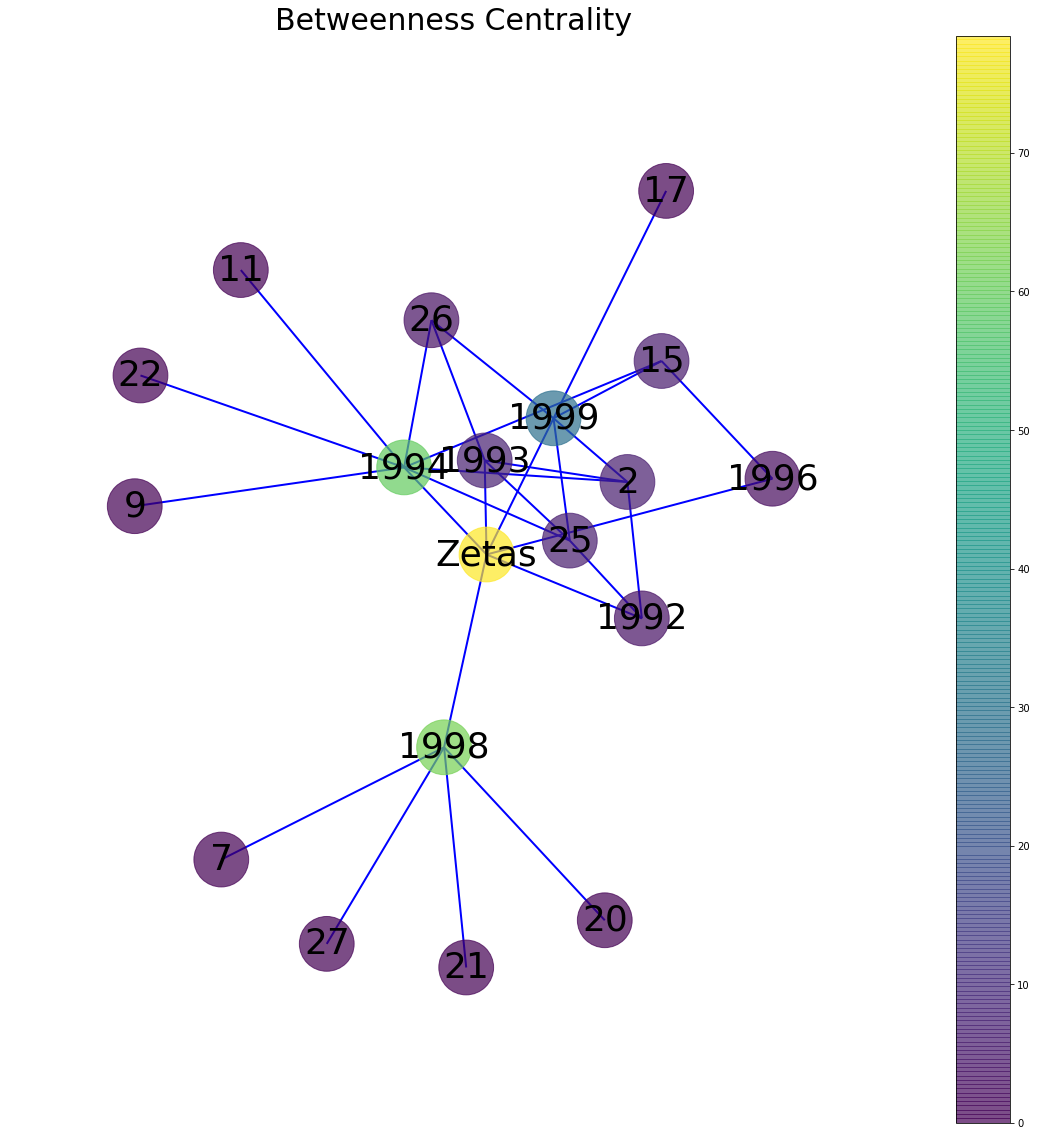

In [39]:
#betweenness centrality
adjacency = pd.read_excel("undirected.xlsx",index_col=0)
e = nx.from_pandas_adjacency(adjacency, create_using=nx.Graph())

B = nx.betweenness_centrality(e,normalized=False)
for key, value in B.items():
    print(key,': ', round(value,2))

options_node = {
    "node_size": 3000,
    "node_color": list(B.values()),
    "alpha":.7,
}

options_edge = {
    "edge_color": "blue",
    "width": 2,
}

options_label = {
    "font_size": 36,
}

pos = nx.spring_layout(e)

nodes = nx.draw_networkx_nodes(e, pos, **options_node)
labels = nx.draw_networkx_labels(e, pos, **options_label)
edges = nx.draw_networkx_edges(e, pos, **options_edge)

ax = plt.gca()
ax.margins(0.20)

# plot axis coordinates
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
plt.axis("off")
plt.rcParams["figure.figsize"] = (20,20)
plt.colorbar(nodes)
plt.title("Betweenness Centrality",fontdict = {'fontsize' : 30})
#plt.savefig("betweenness_centrality.png",format='PNG')
plt.show()

11 :  0.36
15 :  0.41
17 :  0.33
1992 :  0.42
1993 :  0.44
1994 :  0.55
1996 :  0.4
1998 :  0.46
1999 :  0.49
2 :  0.43
20 :  0.32
21 :  0.32
22 :  0.36
25 :  0.43
26 :  0.41
27 :  0.32
7 :  0.32
9 :  0.36
Zetas :  0.6


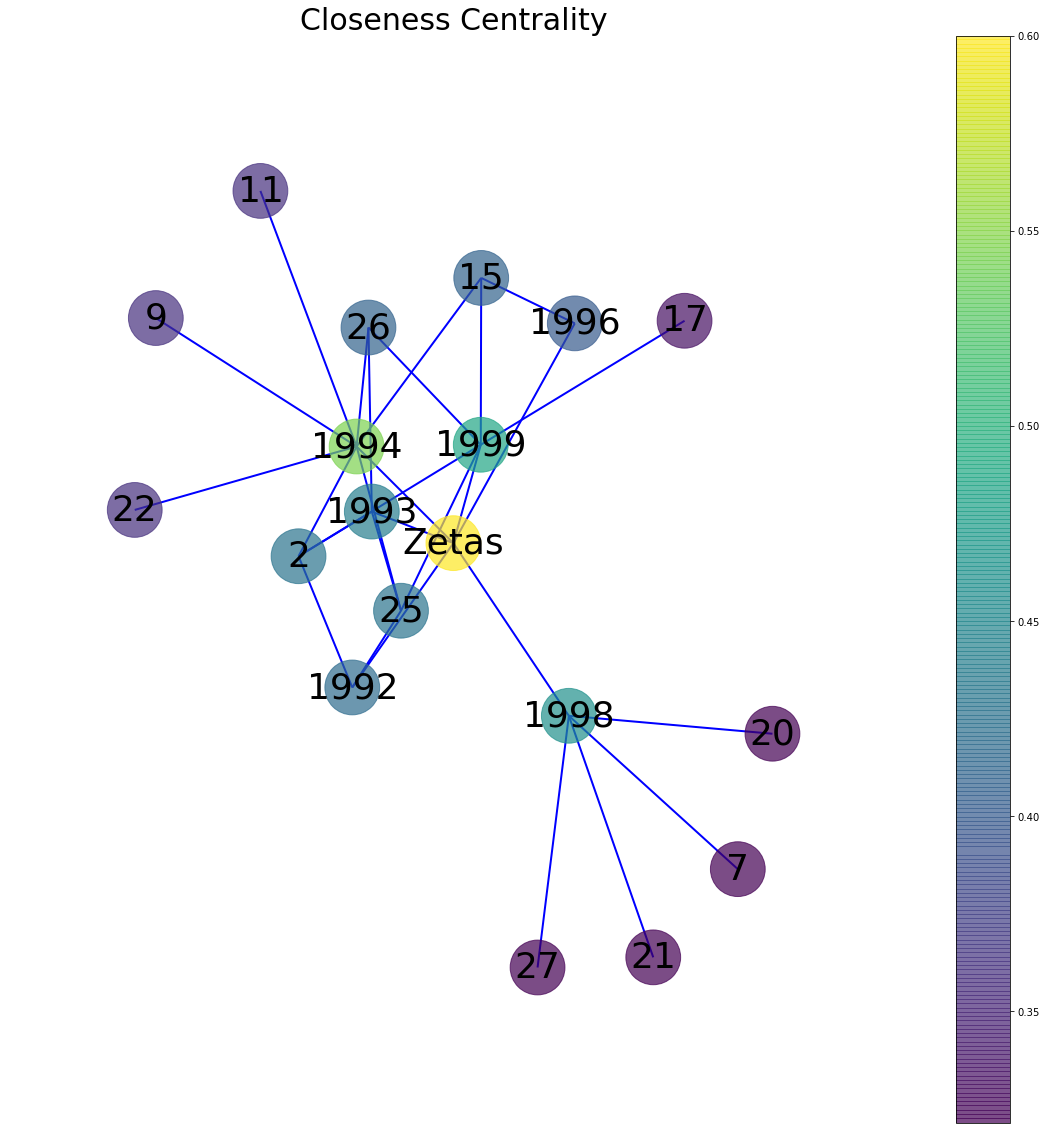

In [42]:
#closeness centrality
adjacency = pd.read_excel("undirected.xlsx",index_col=0)
c = nx.from_pandas_adjacency(adjacency, create_using=nx.Graph())

Clo = nx.closeness_centrality(c)
for key, value in Clo.items():
    print(key,': ', round(value,2))

options_node = {
    "node_size": 3000,
    "node_color": list(Clo.values()),
    "alpha":.7,
}

options_edge = {
    "edge_color": "blue",
    "width": 2,
}

options_label = {
    "font_size": 36,
}

pos = nx.spring_layout(c)

nodes = nx.draw_networkx_nodes(c, pos, **options_node)
labels = nx.draw_networkx_labels(c, pos, **options_label)
edges = nx.draw_networkx_edges(c, pos, **options_edge)

ax = plt.gca()
ax.margins(0.20)

# plot axis coordinates
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
plt.axis("off")
plt.rcParams["figure.figsize"] = (20,20)
plt.colorbar(nodes)
plt.title("Closeness Centrality",fontdict = {'fontsize' : 30})
#plt.savefig("betweenness_centrality.png",format='PNG')
plt.show()

11 :  1
15 :  3
17 :  1
1992 :  3
1993 :  4
1994 :  8
1996 :  2
1998 :  5
1999 :  6
2 :  4
20 :  1
21 :  1
22 :  1
25 :  4
26 :  3
27 :  1
7 :  1
9 :  1
Zetas :  6


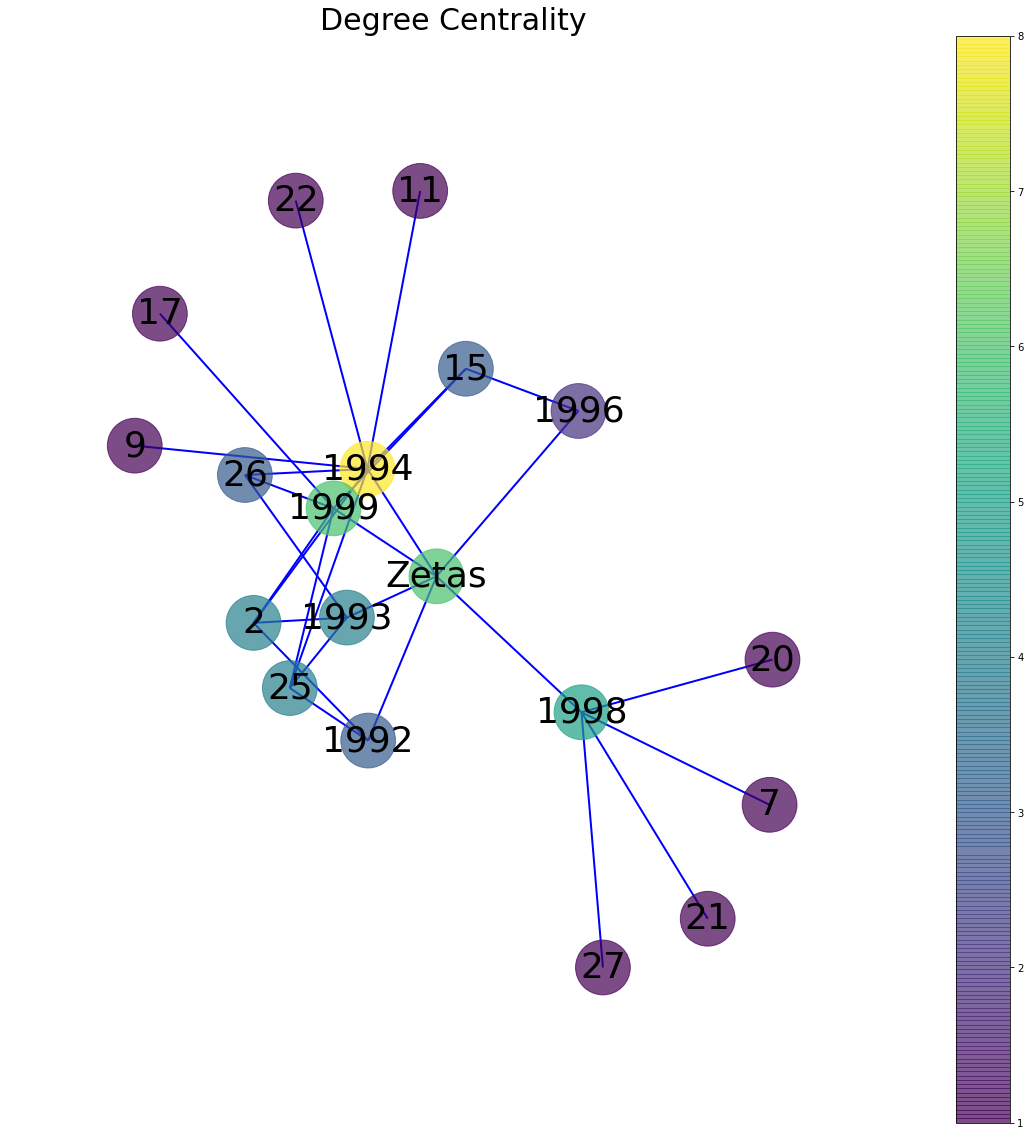

In [43]:
#DEGREE CENTRALITY
adjacency = pd.read_excel("undirected.xlsx",index_col=0)
D = nx.from_pandas_adjacency(adjacency, create_using=nx.Graph())

# build a dictionary with the degrees 
# of all the nodes in the graph 
degrees = dict(D.degree())
for key, value in degrees.items():
    print(key,': ', value)


options_node = {
    "node_size": 3000,
    "node_color": list(degrees.values()),
    "alpha":.7,
}

options_edge = {
    "edge_color": "blue",
    "width": 2,
}

options_label = {
    "font_size": 36,
}

pos = nx.spring_layout(D)

nodes = nx.draw_networkx_nodes(D, pos, **options_node)
labels = nx.draw_networkx_labels(D, pos, **options_label)
edges = nx.draw_networkx_edges(D, pos, **options_edge)
    
# Set margins for the axes so that nodes aren't clipped
ax = plt.gca()
ax.margins(0.20)

# plot axis coordinates
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
plt.axis("off")
plt.rcParams["figure.figsize"] = (20,20)
plt.colorbar(nodes)
plt.title("Degree Centrality",fontdict = {'fontsize' : 30})
#plt.savefig("degree_centrality.png",format='PNG')
plt.show()


11 :  0.10031329592276057
15 :  0.2222695303859209
17 :  0.08842000597428945
1992 :  0.23881382391892692
1993 :  0.3002654730072206
1994 :  0.4240386715007671
1996 :  0.1417620734365432
1998 :  0.11490364002495818
1999 :  0.3737638785024036
2 :  0.316261454002035
20 :  0.027182799750936674
21 :  0.027182799750936674
22 :  0.10031329592276057
25 :  0.316261454002035
26 :  0.2597660656842532
27 :  0.027182799750936674
7 :  0.027182799750936674
9 :  0.10031329592276057
Zetas :  0.3769804822418425


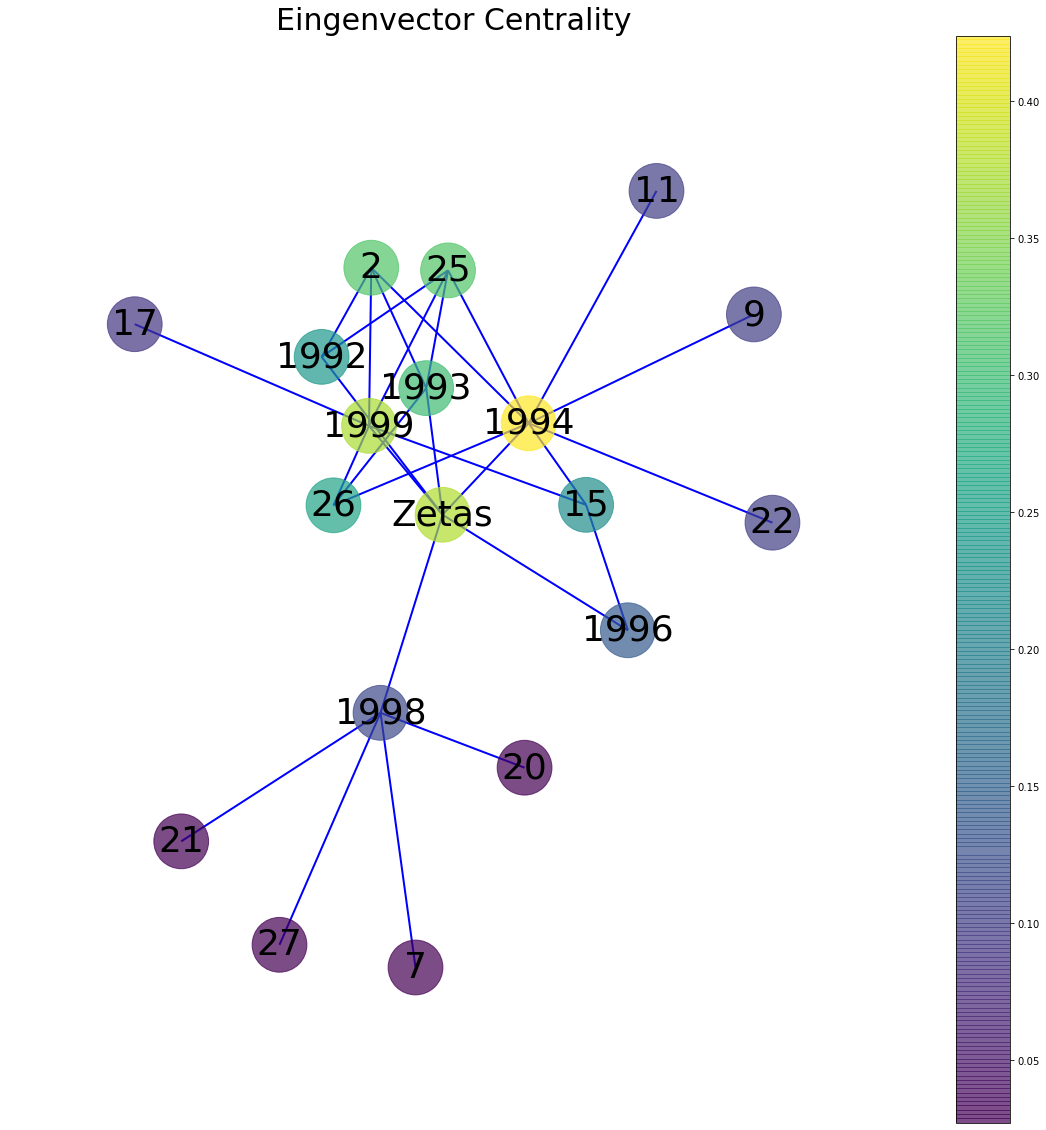

In [45]:
#eingenvector centrality
adjacency = pd.read_excel("undirected.xlsx",index_col=0)
E = nx.from_pandas_adjacency(adjacency, create_using=nx.Graph())

# build a dictionary with the degrees 
# of all the nodes in the graph 
eingen = nx.eigenvector_centrality(E)
for key, value in eingen.items():
    print(key,': ', value)


options_node = {
    "node_size": 3000,
    "node_color": list(eingen.values()),
    "alpha":.7,
}

options_edge = {
    "edge_color": "blue",
    "width": 2,
}

options_label = {
    "font_size": 36,
}

pos = nx.spring_layout(E)

nodes = nx.draw_networkx_nodes(E, pos, **options_node)
labels = nx.draw_networkx_labels(E, pos, **options_label)
edges = nx.draw_networkx_edges(E, pos, **options_edge)
    
# Set margins for the axes so that nodes aren't clipped
ax = plt.gca()
ax.margins(0.20)

# plot axis coordinates
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
plt.axis("off")
plt.rcParams["figure.figsize"] = (20,20)
plt.colorbar(nodes)
plt.title("Eingenvector Centrality",fontdict = {'fontsize' : 30})
#plt.savefig("degree_centrality.png",format='PNG')
plt.show()
